In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from bs4 import BeautifulSoup

# Featurization of textual data
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Better metric for judging multilabel classification solution
from sklearn.metrics import hamming_loss,f1_score

# Pretrained word2vec models
from gensim.models import Word2Vec,KeyedVectors
import spacy

# For multiclass/multilabel training
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

# tqdm is used to print the progrss bar
from tqdm import tqdm

stop_words = ["able","about","above","abroad","according","accordingly","across","actually","adj","after","afterwards","again","against","ago","ahead","ain't","all","allow","allows","almost","alone","along","alongside","already","also","although","always","am","amid","amidst","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","a's","aside","ask","asking","associated","at","available","away","awfully","back","backward","backwards","be","became","because","become","becomes","becoming","been","before","beforehand","begin","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","came","can","cannot","cant","can't","caption","cause","causes","certain","certainly","changes","clearly","c'mon","co","co.","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","dare","daren't","definitely","described","despite","did","didn't","different","directly","do","does","doesn't","doing","done","don't","down","downwards","during","each","edu","eg","eight","eighty","either","else","elsewhere","end","ending","enough","entirely","especially","et","etc","even","ever","evermore","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","fairly","far","farther","few","fewer","fifth","first","five","followed","following","follows","for","forever","former","formerly","forth","forward","found","four","from","further","furthermore","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","had","hadn't","half","happens","hardly","has","hasn't","have","haven't","having","he","he'd","he'll","hello","help","hence","her","here","hereafter","hereby","herein","here's","hereupon","hers","herself","he's","hi","him","himself","his","hither","hopefully","how","howbeit","however","hundred","i'd","ie","if","ignored","i'll","i'm","immediate","in","inasmuch","inc","inc.","indeed","indicate","indicated","indicates","inner","inside","insofar","instead","into","inward","is","isn't","it","it'd","it'll","its","it's","itself","i've","just","k","keep","keeps","kept","know","known","knows","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","likewise","little","look","looking","looks","low","lower","ltd","made","mainly","make","makes","many","may","maybe","mayn't","me","mean","meantime","meanwhile","merely","might","mightn't","mine","minus","miss","more","moreover","most","mostly","mr","mrs","much","must","mustn't","my","myself","name","namely","nd","near","nearly","necessary","need","needn't","needs","neither","never","neverf","neverless","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","no-one","nor","normally","not","nothing","notwithstanding","novel","now","nowhere","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","one's","only","onto","opposite","or","other","others","otherwise","ought","oughtn't","our","ours","ourselves","out","outside","over","overall","own","particular","particularly","past","per","perhaps","placed","please","plus","possible","presumably","probably","provided","provides","que","quite","qv","rather","rd","re","really","reasonably","recent","recently","regarding","regardless","regards","relatively","respectively","right","round","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","shan't","she","she'd","she'll","she's","should","shouldn't","since","six","so","some","somebody","someday","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that's","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","there'd","therefore","therein","there'll","there're","theres","there's","thereupon","there've","these","they","they'd","they'll","they're","they've","thing","things","think","third","thirty","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","till","to","together","too","took","toward","towards","tried","tries","truly","try","trying","t's","twice","two","un","under","underneath","undoing","unfortunately","unless","unlike","unlikely","until","unto","up","upon","upwards","us","use","used","useful","uses","using","usually","v","value","various","versus","very","via","viz","vs","want","wants","was","wasn't","way","we","we'd","welcome","well","we'll","went","were","we're","weren't","we've","what","whatever","what'll","what's","what've","when","whence","whenever","where","whereafter","whereas","whereby","wherein","where's","whereupon","wherever","whether","which","whichever","while","whilst","whither","who","who'd","whoever","whole","who'll","whom","whomever","who's","whose","why","will","willing","wish","with","within","without","wonder","won't","would","wouldn't","yes","yet","you","you'd","you'll","your","you're","yours","yourself","yourselves","you've","zero","a","how's","i","when's","why's","b","c","d","e","f","g","h","j","l","m","n","o","p","q","r","s","t","u","uucp","w","x","y","z","I","www","amount","bill","bottom","call","computer","con","couldnt","cry","de","describe","detail","due","eleven","empty","fifteen","fifty","fill","find","fire","forty","front","full","give","hasnt","herse","himse","interest","itse”","mill","move","myse”","part","put","show","side","sincere","sixty","system","ten","thick","thin","top","twelve","twenty","abst","accordance","act","added","adopted","affected","affecting","affects","ah","announce","anymore","apparently","approximately","aren","arent","arise","auth","beginning","beginnings","begins","biol","briefly","ca","date","ed","effect","et-al","ff","fix","gave","giving","heres","hes","hid","home","id","im","immediately","importance","important","index","information","invention","itd","keys","kg","km","largely","lets","line","'ll","means","mg","million","ml","mug","na","nay","necessarily","nos","noted","obtain","obtained","omitted","ord","owing","page","pages","poorly","possibly","potentially","pp","predominantly","present","previously","primarily","promptly","proud","quickly","ran","readily","ref","refs","related","research","resulted","resulting","results","run","sec","section","shed","shes","showed","shown","showns","shows","significant","significantly","similar","similarly","slightly","somethan","specifically","state","states","stop","strongly","substantially","successfully","sufficiently","suggest","thered","thereof","therere","thereto","theyd","theyre","thou","thoughh","thousand","throug","til","tip","ts","ups","usefully","usefulness","'ve","vol","vols","wed","whats","wheres","whim","whod","whos","widely","words","world","youd","youre"]

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [5]:
df.describe()

,Id
count,6.034195e+06
mean,3.017098e+06
std,1.741922e+06
min,1.000000e+00
25%,1.508550e+06
50%,3.017098e+06
75%,4.525646e+06
max,6.034195e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6034195 entries, 0 to 6034194
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Title   object
 2   Body    object
 3   Tags    object
dtypes: int64(1), object(3)
memory usage: 184.1+ MB


In [7]:
# Title and Body of the question posted.

print(df.Title.iloc[0])
print('\n')
print(df.Body.iloc[0])

How to check if an uploaded file is an image without mime type?


<p>I'd like to check if an uploaded file is an image file (e.g png, jpg, jpeg, gif, bmp) or another file. The problem is that I'm using Uploadify to upload the files, which changes the mime type and gives a 'text/octal' or something as the mime type, no matter which file type you upload.</p>

<p>Is there a way to check if the uploaded file is an image apart from checking the file extension using PHP?</p>



<h1> Data Loading </h1>

In [8]:
# Dropping rows with NaN values.

df = df.dropna(axis=0)

In [9]:
# Feature Generation : Number of tags

df['tag_count'] = df.Tags.apply(lambda text : len(text.split(' ')))

In [10]:
df.head()

,Id,Title,Body,Tags,tag_count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3


In [11]:
# Removing rows with same "Title"

df_new = df.drop_duplicates(subset='Title')

In [12]:
# Percentage of duplicate data removed

100 - 100*(len(df_new)/len(df))

31.635761371001593

In [13]:
# Tag dictionary

tag_dict = {}
for i in df_new.Tags:
    for j in i.split(' '):
        if(j in tag_dict) : tag_dict[j] += 1
        else : tag_dict[j] = 1

In [14]:
# Generating a wordcloud

word_cloud1 = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate_from_frequencies(tag_dict)

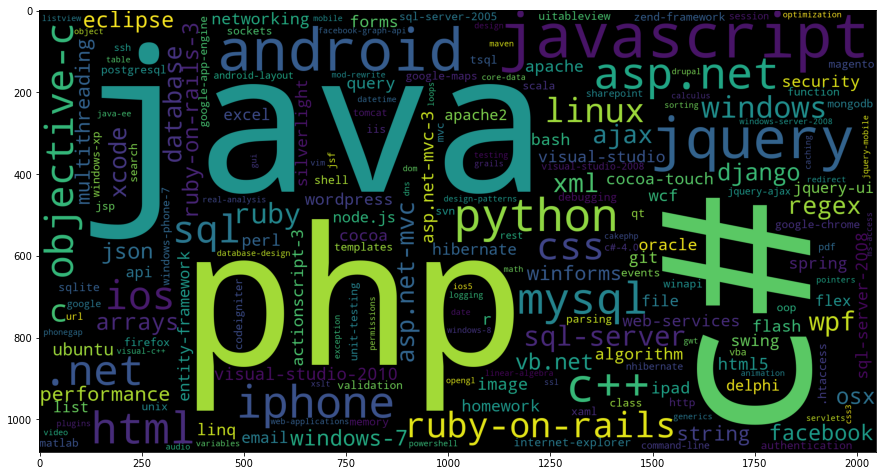

In [15]:
plt.figure(figsize=(15,15))
plt.imshow(word_cloud1)

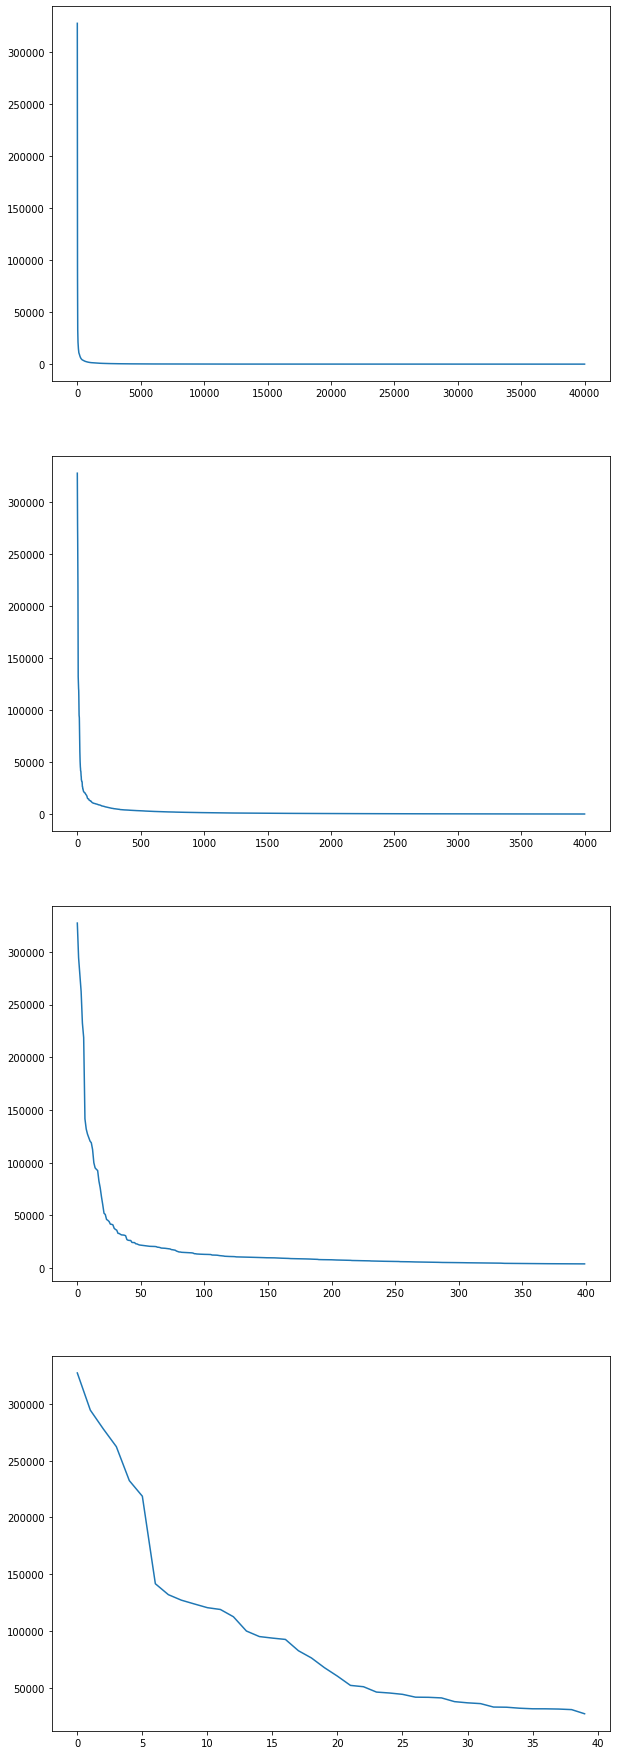

In [17]:
# Skewness in tag count

plt.figure(figsize=(10,40))
for i in range(4):
    plt.subplot(511+i)
    plt.plot([tag_dict[i] for i in sorted(tag_dict,key=tag_dict.get,reverse=True)[:int(40000/(10**i))]])

<h1> Data Preprocessing </h1>

In [21]:
def get_code(text):
    return re.compile('<code>(.*?)</code>').findall(text)

def remove_code(text):
    return re.sub("<code>(.+?)</code>", '', text)

# Remove html tags
def remove_html(text):
    return re.sub('<.*?>', '', text)

# Remove special characters from body and title
def remove_special(text):
    return re.sub(r"[^a-zA-Z0-9]+",' ',text)

# Remove stop words
def remove_stopwords(text):
    stopwords_dict = Counter(stop_words)
    return ' '.join([word for word in text.split() if word not in stopwords_dict])

# Stemming
def stem_text(text):
    p = PorterStemmer()
    return " ".join([ p.stem(word)for word in text.split(' ')])

text = "this. is, <code> /part of' the[] code ]</code> -and also, <code> *this% </code>$ these are <p> some tags </p>"
print(remove_code(text))
print(get_code(text))
print(remove_html(text))
print(remove_special(text))
print(remove_stopwords(text))
print(stem_text(text))

this. is,  -and also, $ these are <p> some tags </p>
[" /part of' the[] code ]", ' *this% ']
this. is,  /part of' the[] code ] -and also,  *this% $ these are  some tags 
this is code part of the code code and also code this code these are p some tags p 
this. is, <code> /part of' the[] code ]</code> -and also, <code> *this% </code>$ <p> tags </p>
this. is, <code> /part of' the[] code ]</code> -and also, <code> *this% </code>$ these are <p> some tag </p>


In [1]:
# Seperating code from the text body
df_new['Code'] = df_new.Body.apply(get_code)
df_new['Body_new'] = df_new.Body.apply(remove_code)

# Removing html tags
df_new['Body_new'] = df_new['Body_new'].apply(remove_html)
df_new['Title'] = df_new['Title'].apply(remove_html)

# Removing special characters
df_new['Body_new'] = df_new['Body_new'].apply(remove_special)
df_new['Title'] = df_new['Title'].apply(remove_special)

# Removing stop words
df_new['Body_new'] = df_new['Body_new'].apply(remove_stopwords)
df_new['Title'] = df_new['Title'].apply(remove_stopwords)

# Performing Stemming
df_new['Body_new'] = df_new['Body_new'].apply(stem_text)
df_new['Title'] = df_new['Title'].apply(stem_text)

In [23]:
df_new[df_new['Code'].apply(len)>0]

,Id,Title,Body,Tags,tag_count,Code,Body_new
15,16,php framework url convent,<p>A lot of frameworks use URL conventions lik...,php url-routing conventions,3,"[/controller/action/{id}, /users/{id}/friends,...",a lot framework url convent great configur wri...
19,20,creat repetit node hash array simplexml load s...,<p>=) I need your kindly help to accomplish a ...,php xml hash multidimensional-array simplexml-...,5,"[abc,def,ghi, $sxe-&gt;asXml('xml/myGreatFile....",kindli accomplish simpl task ve search it shou...
27,28,,<p>I've been wondering if I can use <code>&lt;...,html semantic line-breaks,3,"[&lt;p&gt;&amp;nbsp;&lt;/p&gt;, &lt;br /&gt;]",ve wonder space paragraph becaus love code sem...
28,29,gcc stl bound check,<p>How to enable bound checking for <code>oper...,c++ gcc stl bounds-checker,4,[operator[]],how enabl bound check iter
29,30,sharepoint caml queri queri custom field freet...,<p>I have a SharePoint document library with a...,sharepoint caml custom-fields,3,"[InternalName, Title, DefaultProperties, Autho...",sharepoint document librari custom column x002...
...,...,...,...,...,...,...,...
6034138,6034139,most comprehens foolproof determin featur net ...,<p>I'm just starting to learn the .NET Micro F...,.net-micro-framework,1,"[List&lt;T&gt;, ArrayList, Hashtable, Dictiona...",start learn net micro framework come c realiz ...
6034139,6034140,catch error,<p>I've got an image processing CFC to handle ...,exception-handling coldfusion,2,"[ImageNew(), &lt;cftry&gt;, &lt;cftry&gt;, &lt...",ve imag process cfc handl upload imag in metho...
6034159,6034160,jqueri live show text cursor firefox,<p>I'm using the jQuery <code>live()</code> fu...,javascript jquery firefox,3,"[live(), live(), bind(), live(), return false;]",jqueri function chang border colour form text ...
6034160,6034161,how store imag mongodb,<p>I am using <code>pymongo</code> to store us...,python django mongodb pymongo,4,"[pymongo, request.FILES.get (...), read(...), ...",store user comment django project save comment...


In [24]:
df_new.head()

,Id,Title,Body,Tags,tag_count,Code,Body_new
0,1,how check upload file imag mime type,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5,[],check upload file imag file png jpg jpeg gif b...
1,2,how prevent firefox close press ctrl,"<p>In my favorite editor (vim), I regularly us...",firefox,1,[],in favorit editor vim regularli ctrl execut ac...
2,3,r error invalid type list variabl,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3,[],import matlab file construct data frame matlab...
3,4,how replac special charact url,"<p>This is probably very simple, but I simply ...",c# url encoding,3,[],thi simpl simpli answer basicali string http g...
4,5,how modifi whoi contact detail,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3,[],function modifi mcontact file content http tes...


<h1> Multi-Label Classification Problem </h1>
<a href="https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/"> Refer for Guide </a>

In [40]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(df_new['Tags'])

In [88]:
# Splitting into training and testing data

df_final = df_new.drop(['Body','Code','Id'],axis=1)

def tags_to_chose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

total_size=df_final.shape[0]
train_size=int(0.80*total_size)

x_train=df_final.head(train_size)
x_test=df_final.tail(df_final.shape[0] - 3300180)

y_train = tags_to_chose(500)[0:train_size,:]
y_test = tags_to_chose(500)[train_size:df_final.shape[0],:]

In [90]:
# Feature Extraction https://stackoverflow.com/questions/44066264/how-to-choose-parameters-in-tfidfvectorizer-in-sklearn-during-unsupervised-clust/44080802#44080802

vec = TfidfVectorizer(min_df=0.00009, max_features=300000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vec.fit_transform(x_train['Title'])
x_test_multilabel = vec.transform(x_test['Title'])

In [91]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3300180, 4)
(3300180, 500)
(825046, 4)
(825046, 500)


In [92]:
# Model Training

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

In [94]:
print(f1_score(y_test,predictions,average='micro'))
print(f1_score(y_test,predictions,average='macro'))

0.44436769369661333
0.3330542153605905
